In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\kishan singh\Downloads\3. Police Data.csv")

In [3]:
df.head(5)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
#remove the column that only contain missing values

In [4]:
df.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [5]:
df.drop(columns ='country_name',inplace= True)

In [6]:
df.head(5)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
# for speeding ,were men and women stopped more often

In [7]:
df[df.violation=='Speeding'].driver_gender.value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

In [ ]:
#does gender affect who gets searched during a stop?

In [8]:
df.groupby('driver_gender').search_conducted.sum()

driver_gender
F     366
M    2113
Name: search_conducted, dtype: int64

In [ ]:
#what is the mean of stop duration?
#change value type string to int 

In [9]:
df.stop_duration.value_counts()

0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

In [10]:
df["stop_duration"]=df['stop_duration'].map({"0-15 Min":7.5,'16-30 Min':24,'30+ Min':40})

In [11]:
df["stop_duration"].mean()

11.972126427432736

In [ ]:
#compare the age disturbutaion for each voilation

In [12]:
df.groupby('driver_age').violation_raw.describe()

,count,unique,top,freq
driver_age,,,,
15.0,5,2,Other Traffic Violation,4
16.0,34,5,Speeding,18
17.0,449,7,Speeding,338
18.0,1344,10,Speeding,980
19.0,2388,9,Speeding,1655
...,...,...,...,...
83.0,2,2,Speeding,1
84.0,3,1,Speeding,3
85.0,1,1,Other Traffic Violation,1


In [ ]:
#visulization

In [13]:
df.head(5)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,24.0,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False


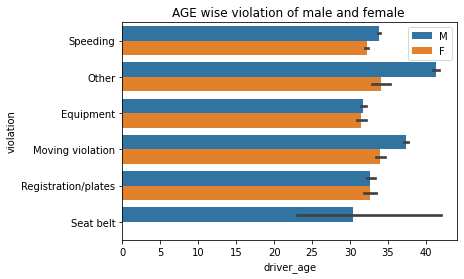

In [29]:
sns.barplot(x="driver_age", y="violation",hue="driver_gender",data=df).set(title='AGE wise violation of male and female ')
plt.legend(loc='upper right')
plt.show()

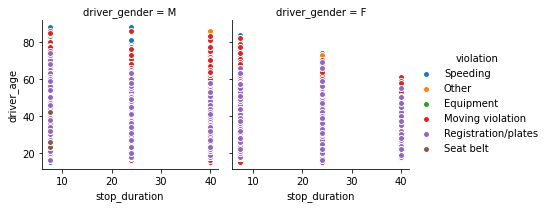

In [37]:
graph = sns.FacetGrid(df, col ="driver_gender",  hue ="violation")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "stop_duration", "driver_age", edgecolor ="w").add_legend()
# show the object
plt.show()